### Import CSV File

In [1]:
import csv 
import pandas as pd 

# Always display all rows
pd.set_option('display.max_columns', None) 

# Read csv file
df = pd.read_csv('feature_engineered_tennis_data.csv')

### All Column Names for Future Reference

In [2]:
# All columns in df
cols = columns = [
    "tournament_date",
    "surface",
    "p1_name",
    "p1_age",
    "p1_height",
    "p2_name",
    "p2_age",
    "p2_height",
    "p1_age_diff",
    "p1_height_diff",
    "p1_h2h_wins",
    "p2_h2h_wins",
    "p1_h2h_wins_before_total_diff",
    "p1_h2h_wins_before_last1_diff",
    "p1_h2h_wins_before_last2_diff",
    "p1_h2h_wins_before_last3_diff",
    "p1_h2h_wins_before_last4_diff",
    "p1_h2h_wins_before_last5_diff",
    "p1_h2h_wins_before_last10_diff",
    "p1_elo_before",
    "p2_elo_before",
    "p1_elo_diff_before",
    "p1_surface_elo_before",
    "p2_surface_elo_before",
    "p1_surface_elo_diff_before",
    "p1_total_matches_played_before",
    "p2_total_matches_played_before",
    "p1_total_matches_before_diff",
    "p1_career_wins_before",
    "p1_career_wins_last3_pct_before",
    "p1_career_wins_last5_pct_before",
    "p1_career_wins_last10_pct_before",
    "result"
]

# Seaborn Plots

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

### Player Attributes

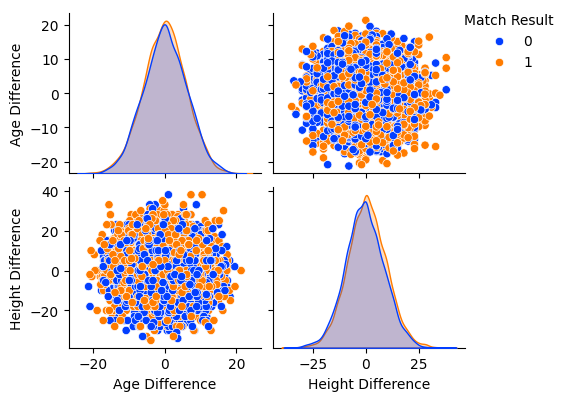

In [4]:
# Columns to visualise
player_attributes_cols = [
    "p1_age_diff",
    "p1_height_diff",
    "result"
]

# Dictionary to rename axes
new_labels = {
    'p1_age_diff': 'Age Difference',
    'p1_height_diff': 'Height Difference',
    'result': 'Match Result'
}

# Take a random 10% sample
plot_df = df[player_attributes_cols].sample(frac=0.1, random_state=42)

# Plot pairplot
plot = sns.pairplot(plot_df, 
    kind='scatter',
    diag_kind='kde',
    hue='result', 
    palette='bright',
    height = 2,
    aspect = 1.2
)

# Move legend to the top-right corner
plot._legend.set_bbox_to_anchor((1.05, 1))  
plot._legend.set_loc('upper right')      

# Loop through all axes to rename x and y labels
for ax in plot.axes.flatten():
    if ax is not None:
        # Rename x-axis
        if ax.get_xlabel() in new_labels:
            ax.set_xlabel(new_labels[ax.get_xlabel()])
        # Rename y-axis
        if ax.get_ylabel() in new_labels:
            ax.set_ylabel(new_labels[ax.get_ylabel()])

# Set legend title
plot._legend.set_title('Match Result')

# Display the plot
plt.show()

In [5]:
# Group by 'result' and calculate the mean and standard deviation for player_attributes
player_attributes_stats = (df.groupby("result")[["p1_age_diff", "p1_height_diff"]].agg(["mean", "std"]))

# Make player_attributes_stats dataframe easier to read
player_attributes_stats.columns = ['_'.join(col) for col in player_attributes_stats.columns]
player_attributes_stats = player_attributes_stats.reset_index()

# Show player_attributes stats Dataframe
player_attributes_stats

,result,p1_age_diff_mean,p1_age_diff_std,p1_height_diff_mean,p1_height_diff_std
0,0,-0.065702,6.001332,-0.414779,9.263480
1,1,0.021124,6.007803,0.415007,9.297458


###### The KDEs show roughly normal distributions centred around 0 with no noticeable skew. The scatter plots appear evenly mixed, without clear clustering, suggesting that age and height do not strongly separate winners from losers. The calculated means further support this, indicating that age and height are not predictive features for match outcomes.

### ELO Ratings

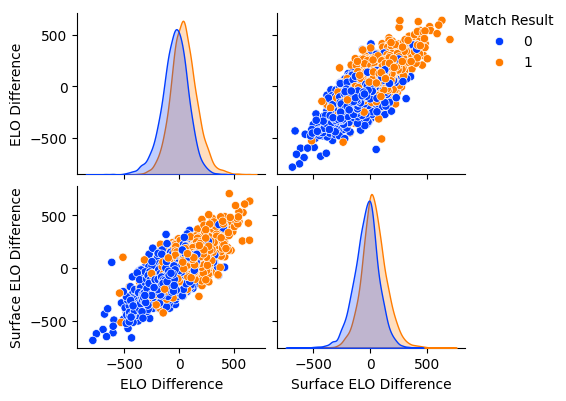

In [6]:
# Columns to visualise
ELO_cols = columns = [
    "p1_elo_diff_before",
    "p1_surface_elo_diff_before",
    "result"
]

new_labels = {
    'p1_elo_diff_before': 'ELO Difference',
    'p1_surface_elo_diff_before': 'Surface ELO Difference',
    'result': 'Match Result'
}

# Take a random 10% sample
plot_df = df[ELO_cols].sample(frac=0.1, random_state=42)

# Plot pairplot
plot = sns.pairplot(plot_df, 
    kind='scatter',
    diag_kind='kde',
    hue='result', 
    palette='bright',
    height = 2,
    aspect = 1.2
)

# Move legend to the top-right corner
plot._legend.set_bbox_to_anchor((1.05, 1))  
plot._legend.set_loc('upper right')      

# Loop through all axes to rename x and y labels
for ax in plot.axes.flatten():
    if ax is not None:
        # Rename x-axis
        if ax.get_xlabel() in new_labels:
            ax.set_xlabel(new_labels[ax.get_xlabel()])
        # Rename y-axis
        if ax.get_ylabel() in new_labels:
            ax.set_ylabel(new_labels[ax.get_ylabel()])

# Set legend title
plot._legend.set_title('Match Result')

# Display the plot
plt.show()

In [7]:
# Group by 'result' and calculate the mean and standard deviation for ELO difference and surface ELO difference
ELO_stats = (df.groupby("result")[["p1_elo_diff_before", "p1_surface_elo_diff_before"]].agg(["mean", "std"]))

# Make ELO_stats dataframe easier to read
ELO_stats.columns = ['_'.join(col) for col in ELO_stats.columns]
ELO_stats = ELO_stats.reset_index()

# Show ELO stats Dataframe
ELO_stats

,result,p1_elo_diff_before_mean,p1_elo_diff_before_std,p1_surface_elo_diff_before_mean,p1_surface_elo_diff_before_std
0,0,-39.610033,120.874629,-33.999460,110.725544
1,1,40.209754,121.429238,34.157254,111.452693


###### The KDEs indicate approximately normal distributions, but the winners’ curves are shifted to the right. This shows that players with higher ELOs and surface ELOs are more likely to win matches. The scatter plots show two clear clusters, with winners generally having higher ELO and surface ELO differences. The calculated means reinforce this bias, confirming that higher-rated players tend to win more often.

### Career Stats

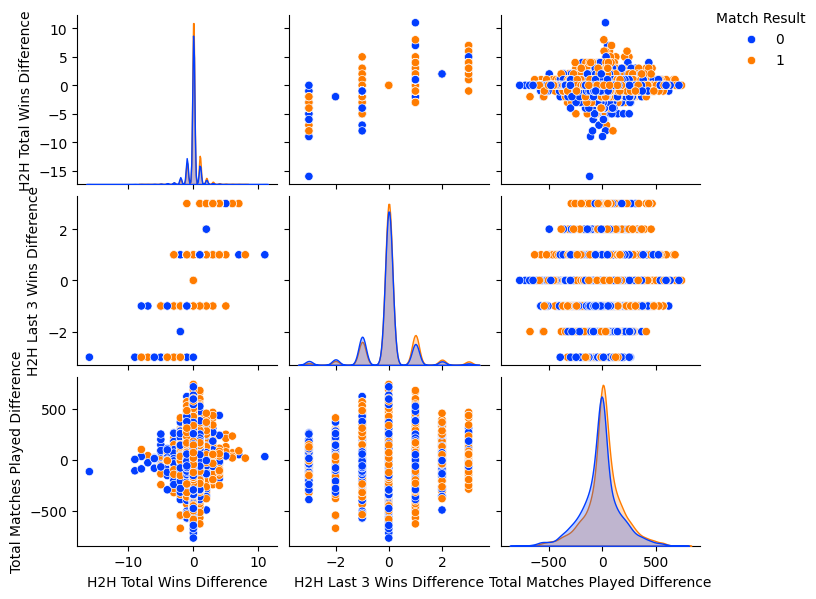

In [8]:
# Columns to visualise
career_stats_cols = [
    "p1_h2h_wins_before_total_diff",
    "p1_h2h_wins_before_last3_diff",
    "p1_total_matches_played_before_diff",
    "result"
]

new_labels = {
    'p1_h2h_wins_before_total_diff': 'H2H Total Wins Difference',
    'p1_h2h_wins_before_last3_diff': 'H2H Last 3 Wins Difference',
    'p1_total_matches_played_before_diff': 'Total Matches Played Difference',
    'p1_career_wins_last3_pct_before': 'Career Wins % Last 3 Matches',
    'result': 'Match Result'
}

# Take a random 10% sample
plot_df = df[career_stats_cols].sample(frac=0.1, random_state=42)

# Plot pairplot
plot = sns.pairplot(plot_df, 
    kind='scatter',
    diag_kind='kde',
    hue='result', 
    palette='bright',
    height = 2,
    aspect = 1.2
)

# Move legend to the top-right corner
plot._legend.set_bbox_to_anchor((1.05, 1))  
plot._legend.set_loc('upper right')      

# Loop through all axes to rename x and y labels
for ax in plot.axes.flatten():
    if ax is not None:
        # Rename x-axis
        if ax.get_xlabel() in new_labels:
            ax.set_xlabel(new_labels[ax.get_xlabel()])
        # Rename y-axis
        if ax.get_ylabel() in new_labels:
            ax.set_ylabel(new_labels[ax.get_ylabel()])

# Set legend title
plot._legend.set_title('Match Result')

# Display the plot
plt.show()

In [9]:
import pandas as pd

# point-biserial correlation (special case of Pearson for binary target)
corr = df.corr(numeric_only=True)["result"].sort_values(ascending=False)
print(corr)

result                                 1.000000
p1_elo_diff_before                     0.312882
p1_surface_elo_diff_before             0.293277
p1_surface_elo_before                  0.142334
p1_elo_before                          0.136684
p1_career_wins_last10_pct_before       0.121548
p1_total_matches_played_before_diff    0.101602
p1_career_wins_last5_pct_before        0.087589
p1_h2h_wins_before_last10_diff         0.084723
p1_h2h_wins_before_last5_diff          0.084571
p1_h2h_wins_before_total_diff          0.084483
p1_h2h_wins_before_last4_diff          0.084034
p1_h2h_wins_before_last3_diff          0.082576
p1_h2h_wins_before_last2_diff          0.078623
p1_career_wins_before                  0.072062
p1_h2h_wins_before_last1_diff          0.071468
p1_total_matches_played_before         0.055709
p1_h2h_wins                            0.047362
p1_career_wins_last3_pct_before        0.046725
p1_height_diff                         0.044662
p1_height                              0